# Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Make Datasets

In [37]:
np.random.seed(42)
X = np.random.rand(1000, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(1000)

In [38]:
df = pd.DataFrame(data=X, columns=['X'])
df['y'] = y
df.head()

,X,y
0,-0.125460,0.056106
1,0.450714,0.542663
2,0.231994,0.180473
3,0.098658,0.059730
4,-0.343981,0.382959


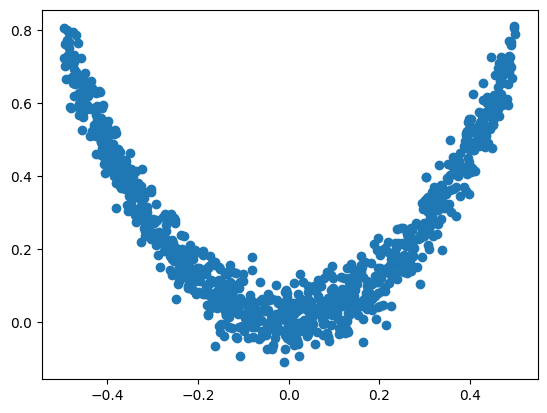

In [39]:
plt.scatter(x='X', y='y', data=df)

# Step 1

In [40]:
df['pred_1'] = df['y'].mean()
df.head()

,X,y,pred_1
0,-0.125460,0.056106,0.261006
1,0.450714,0.542663,0.261006
2,0.231994,0.180473,0.261006
3,0.098658,0.059730,0.261006
4,-0.343981,0.382959,0.261006


# Step 2:

In [41]:
df['res_1'] = df['y'] - df['pred_1']
df.head()

,X,y,pred_1,res_1
0,-0.125460,0.056106,0.261006,-0.204901
1,0.450714,0.542663,0.261006,0.281657
2,0.231994,0.180473,0.261006,-0.080533
3,0.098658,0.059730,0.261006,-0.201277
4,-0.343981,0.382959,0.261006,0.121953


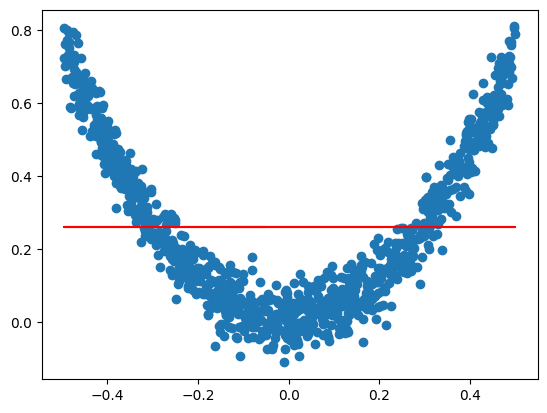

In [42]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred_1'], color='red')

# Step 3 : Make a Decision Tree

In [43]:
model_2 = DecisionTreeRegressor(max_depth=8) #8->32
model_2.fit(df[['X']], df['res_1'])

# model_2.fit(df['X'].values.reshape(100,1),df['res_1'].values)

DecisionTreeRegressor(max_depth=8)

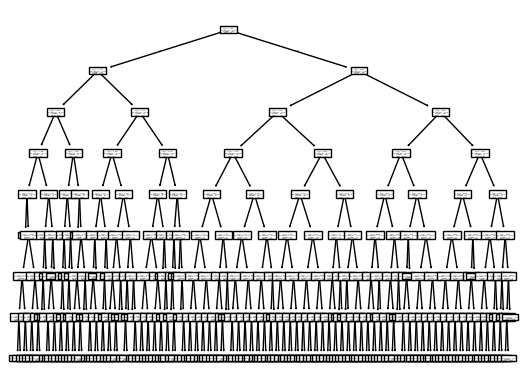

In [44]:
plot_tree(model_2)
plt.show()

# Step 4: Prediction y_pred_2 calculation

In [45]:
df['pred_2'] = df['pred_1'] + model_2.predict(df[['X']])
df.head()

,X,y,pred_1,res_1,pred_2
0,-0.125460,0.056106,0.261006,-0.204901,0.065132
1,0.450714,0.542663,0.261006,0.281657,0.566067
2,0.231994,0.180473,0.261006,-0.080533,0.182157
3,0.098658,0.059730,0.261006,-0.201277,0.042696
4,-0.343981,0.382959,0.261006,0.121953,0.365334


# Step 5: Residuals 2 calculation

In [46]:
df['res_2'] = df['y'] - df['pred_2']
df.head()

,X,y,pred_1,res_1,pred_2,res_2
0,-0.125460,0.056106,0.261006,-0.204901,0.065132,-0.009026
1,0.450714,0.542663,0.261006,0.281657,0.566067,-0.023404
2,0.231994,0.180473,0.261006,-0.080533,0.182157,-0.001684
3,0.098658,0.059730,0.261006,-0.201277,0.042696,0.017033
4,-0.343981,0.382959,0.261006,0.121953,0.365334,0.017625


In [55]:
X_test = np.linspace(-0.5, 0.5, 1000)

In [56]:
y_pred = df['pred_1'] + model_2.predict(X_test.reshape(1000, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


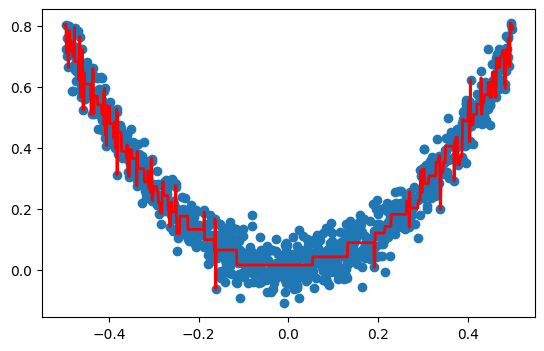

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

# Custom Fuction

In [58]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


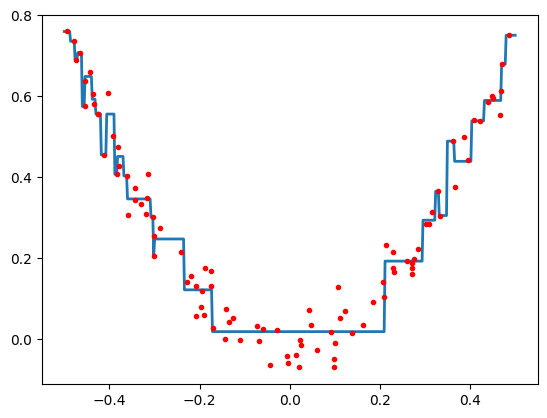

4


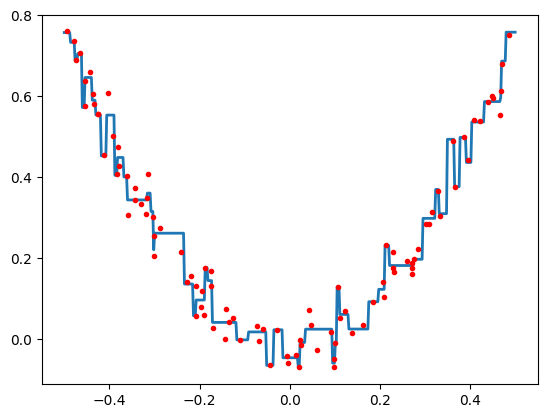

3


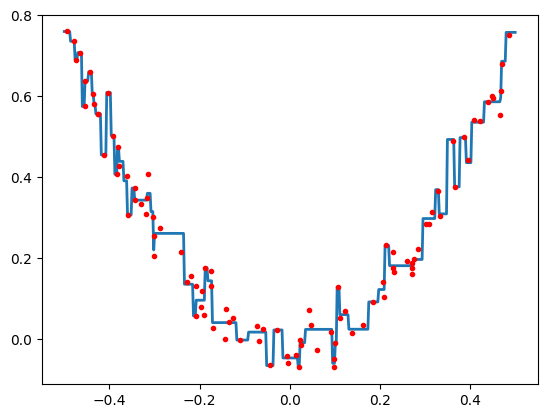

2


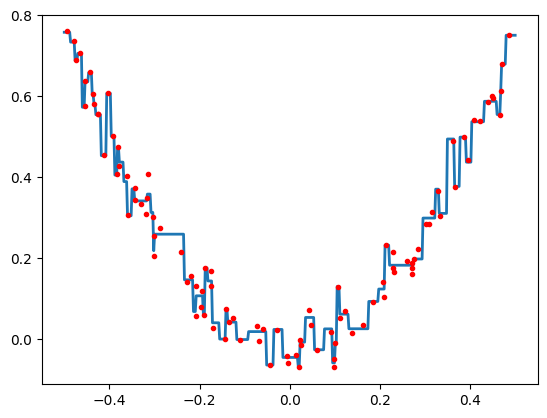

1


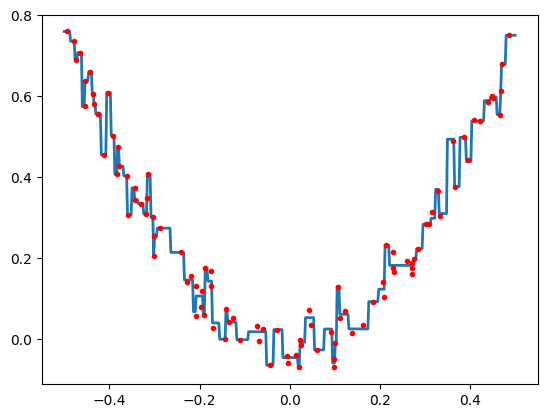

In [59]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

# Custom Class

In [47]:
class CustomGradientBoosting:

  def __init__(self, learning_rate = 0.1, n_model = 10) -> None:
    self.lr = learning_rate
    self.n_model = n_model
    self.models = []



  def fit(self, X, y):

    y_pred = np.full(y.shape, y.mean())

    for i in range(self.n_model):
      res = y - y_pred
      model = DecisionTreeRegressor(max_depth=8)
      model.fit(X, res)
      self.models.append(model)
      y_pred += self.lr * model.predict(X)

  def predict(self, X):
    y_pred = np.full(X.shape[0], self.models[0].predict(X).mean())

## Check

In [48]:
my_boosting = CustomGradientBoosting(n_model=10)
my_boosting.fit(df[['X']], df['y'])